# News text classification web app

About Dataset


---


This is text document classification dataset which contains 2225 text data and five categories of documents. Five categories are politics, sport, tech, entertainment and business. We can use this dataset for documents classification and document clustering.

Dataset contains two features text and label.

No. of Rows : 2225

No. of Columns : 2

Text:It contains different categories of text data

**Label: **It contains labels for five different categories : 0,1,2,3,4

Politics = 0

Sport = 1

Technology = 2

Entertainment =3

Business = 4

## 1. Data Preparation and Exploration

* Collect and Load Data

 * Understend the newspaper dataset with varied sentiment labels (positive, negative, neutral).

 * Examples: Scrape or obtain a labeled dataset like News Aggregator, or create labels if starting with raw text.

* Data Exploration and Cleaning

 * Check for data imbalances in sentiment categories and handle them (e.g., through resampling).
 * Clean text data (remove special characters, irrelevant symbols, whitespace, etc.).

* Conduct exploratory data analysis (EDA) to understand data distribution, length of articles, sentiment label distribution.
* Data Splitting

 * Split data into training, validation, and test sets. Aim for a typical split of 70% train, 15% validation, and 15% test.

In [44]:
# collect the data from my github repository
import pandas as pd

file_url = "https://github.com/dev-Sujon/Branching_Tools/raw/refs/heads/master/df_file.csv"

try:
    df = pd.read_csv(file_url)
    print(df.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"Error: File not found at {file_url}. Please check the URL.")
except Exception as e:
    print(f"An error occurred: {e}")

                                                Text  Label
0  Budget to set scene for election\n \n Gordon B...      0
1  Army chiefs in regiments decision\n \n Militar...      0
2  Howard denies split over ID cards\n \n Michael...      0
3  Observers to monitor UK election\n \n Minister...      0
4  Kilroy names election seat target\n \n Ex-chat...      0


In [45]:
print("shape of the dataset is :", df.shape)

shape of the dataset is : (2225, 2)


In [46]:
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [47]:
df.describe()

,Label
count,2225.000000
mean,2.027416
std,1.438694
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [48]:
# check if there any null value in the dataset
df.isnull().sum()

,0
Text,0
Label,0


No fissing value

Summary

There are no "Null" values, so no need to replace anything.

Dataset had 98 duplicated rows that have been dropped.

Distribution of labels ranges between 17% - 24% which are acceptable.

In [49]:
import pandas as pd
# Define the label encoding mapping
label_mapping = {
    0:'Politics',
    2:'Sport',
    3:'Technology',
    4:'Entertainment',
    5:'Business'
}

# Apply the label encoding
df['Label_encoded'] = df['Label'].map(label_mapping)

# Display the updated DataFrame
print(df)


                                                   Text  Label  Label_encoded
0     Budget to set scene for election\n \n Gordon B...      0       Politics
1     Army chiefs in regiments decision\n \n Militar...      0       Politics
2     Howard denies split over ID cards\n \n Michael...      0       Politics
3     Observers to monitor UK election\n \n Minister...      0       Politics
4     Kilroy names election seat target\n \n Ex-chat...      0       Politics
...                                                 ...    ...            ...
2220  India opens skies to competition\n \n India wi...      4  Entertainment
2221  Yukos bankruptcy 'not US matter'\n \n Russian ...      4  Entertainment
2222  Survey confirms property slowdown\n \n Governm...      4  Entertainment
2223  High fuel prices hit BA's profits\n \n British...      4  Entertainment
2224  US trade gap hits record in 2004\n \n The gap ...      4  Entertainment

[2225 rows x 3 columns]


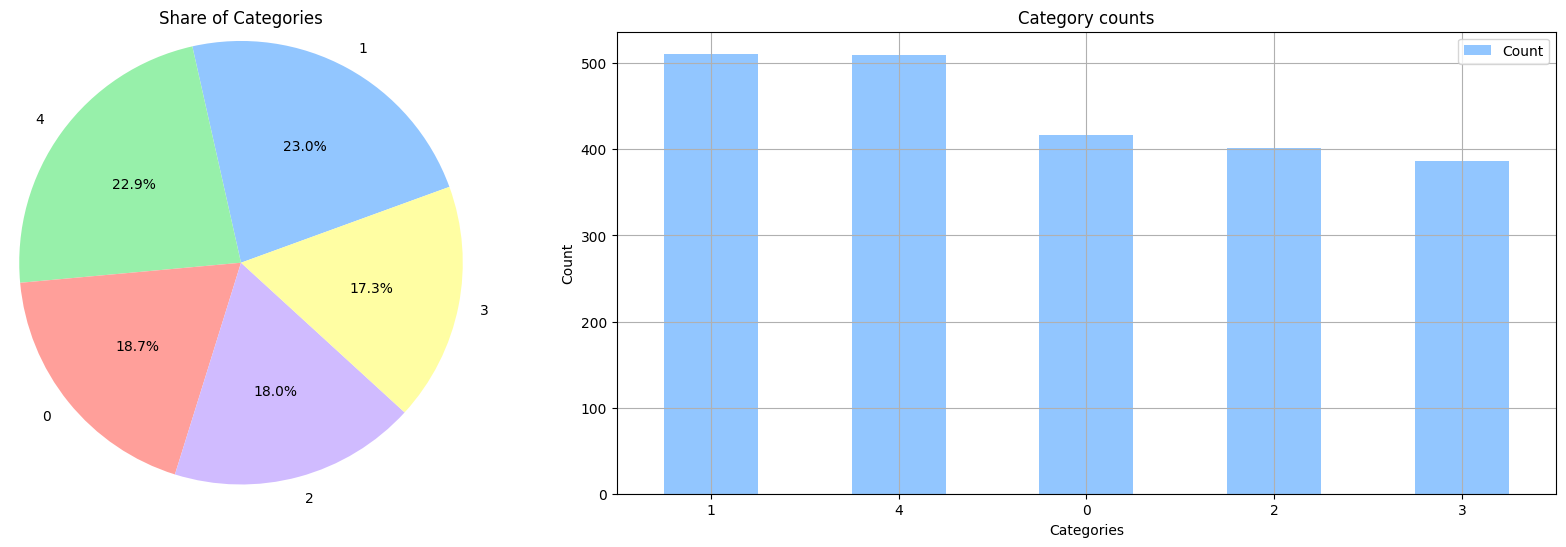

In [50]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')

fig, axs = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 2]})

# Pie Chart
ax1 = axs[0]
subject = df['Label'].value_counts().reset_index(name='Count')
ax1.pie(subject['Count'], labels=subject['Label'], autopct='%1.1f%%', radius=1.2, startangle=20)
ax1.set_title(f'Share of Categories')

# Bar Chart
ax2 = axs[1]
subject.plot(kind='bar', x='Label', ax=ax2)
ax2.set_title('Category counts')
ax2.set_xlabel('Categories')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(True)

plt.show()

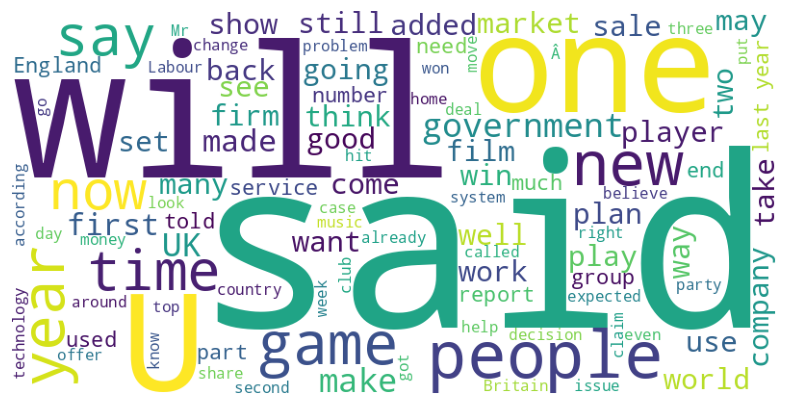

In [51]:
from wordcloud import WordCloud, STOPWORDS

all_text = ' '.join(df['Text'])
wc = WordCloud(width=800,
               height=400,
               background_color='white',
               max_words=100).generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 2. Model Selection and Preparation

* Choose a Pretrained Model

 * Start with a base sentiment analysis model from Hugging Face (e.g., bert-base-uncased, distilbert-base-uncased, or a model like BERT fine-tuned on sentiment).
 * Load the model using the Transformers library.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import re


In [53]:
df['Text'][100]

'Blair dismisses quit claim report\n \n Tony Blair has dismissed reports he told Gordon Brown he would quit before the next general election.\n \n "You don\'t do deals over jobs like this," the prime minister told BBC One\'s Breakfast with Frost programme. According to a new book, Brown\'s Britain, Mr Blair went back on a pledge to make way for Mr Brown after Cabinet allies intervened in June 2004. Mr Blair said the claims were "reheated from six months ago" and that he was concentrating on running the country. Mr Blair said: "I\'ve dealt with this six months ago. I said then you don\'t do deals over jobs like this - you don\'t.\n \n "What both of us are actually concentrating on are the issues that concern the country." The book, by Sunday Telegraph journalist Robert Peston and serialised in the newspaper, said the pair had "mutual animosity and contempt" for each other.\n \n It claims Tony Blair felt by November 2003 he had lost voters\' trust because of the Iraq war and that he was 

In [54]:
df.tail()

,Text,Label,Label_encoded
2220,India opens skies to competition\n \n India wi...,4,Entertainment
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4,Entertainment
2222,Survey confirms property slowdown\n \n Governm...,4,Entertainment
2223,High fuel prices hit BA's profits\n \n British...,4,Entertainment
2224,US trade gap hits record in 2004\n \n The gap ...,4,Entertainment


In [55]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure you have the necessary NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
def preprocess_text(text_series):
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    cleaned_texts = []

    for text in text_series:
        if isinstance(text, str):  # Check if the item is a string
            # Convert text to lowercase
            text = text.lower()

            # Remove punctuation
            text = text.translate(str.maketrans("", "", string.punctuation))

            # Remove numbers
            text = re.sub(r'\d+', '', text)

            # Tokenize text
            tokens = word_tokenize(text)

            # Remove stop words
            stop_words = set(stopwords.words("english"))
            tokens = [word for word in tokens if word not in stop_words]

            # Lemmatize tokens
            tokens = [lemmatizer.lemmatize(word) for word in tokens]

            # Join tokens back into a string
            cleaned_text = " ".join(tokens)
        else:
            cleaned_text = ''  # If not a string, you can handle it as you wish

        cleaned_texts.append(cleaned_text)

    return cleaned_texts

# Assuming you already have your DataFrame named `df`
# Preprocess the 'Text' column and add cleaned text to a new column
df['cleaned_text'] = preprocess_text(df["Text"])

# Display original and cleaned text
print("Original text:")
print(df["Text"])

print("\nCleaned text:")
print(df["cleaned_text"])


Original text:
0       Budget to set scene for election\n \n Gordon B...
1       Army chiefs in regiments decision\n \n Militar...
2       Howard denies split over ID cards\n \n Michael...
3       Observers to monitor UK election\n \n Minister...
4       Kilroy names election seat target\n \n Ex-chat...
                              ...                        
2220    India opens skies to competition\n \n India wi...
2221    Yukos bankruptcy 'not US matter'\n \n Russian ...
2222    Survey confirms property slowdown\n \n Governm...
2223    High fuel prices hit BA's profits\n \n British...
2224    US trade gap hits record in 2004\n \n The gap ...
Name: Text, Length: 2225, dtype: object

Cleaned text:
0       budget set scene election gordon brown seek pu...
1       army chief regiment decision military chief ex...
2       howard denies split id card michael howard den...
3       observer monitor uk election minister invite i...
4       kilroy name election seat target exchat show h...
  

In [57]:
df.head(5)

,Text,Label,Label_encoded,cleaned_text
0,Budget to set scene for election\n \n Gordon B...,0,Politics,budget set scene election gordon brown seek pu...
1,Army chiefs in regiments decision\n \n Militar...,0,Politics,army chief regiment decision military chief ex...
2,Howard denies split over ID cards\n \n Michael...,0,Politics,howard denies split id card michael howard den...
3,Observers to monitor UK election\n \n Minister...,0,Politics,observer monitor uk election minister invite i...
4,Kilroy names election seat target\n \n Ex-chat...,0,Politics,kilroy name election seat target exchat show h...


* Tokenization and Data Preprocessing

 * Tokenize your dataset using the tokenizer associated with your chosen model.
 * Pad and truncate sequences to a fixed length to handle batch processing.
 * Convert data into Dataset objects compatible with Hugging Face's Datasets library for efficient handling.

In [58]:
df.shape

(2225, 4)

In [59]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from transformers import AutoTokenizer

# Ensure you have NLTK data downloaded
nltk.download('punkt')

# Assuming df is your existing DataFrame and 'cleaned_text' is the column of interest

# Initialize the Hugging Face tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Lists to store tokenized sentences and words
all_tokenized_sentences = []
all_tokenized_words = []
all_huggingface_tokens = []
all_input_ids = []

# Iterate over each row in the cleaned_text column
for text in df['cleaned_text']:
    # NLTK Tokenization
    # Tokenizing sentences
    sentences = sent_tokenize(text)
    all_tokenized_sentences.append(sentences)
    print("Tokenized Sentences:")
    print(sentences)

    # Tokenizing words
    words = word_tokenize(text)
    all_tokenized_words.append(words)


    # Hugging Face Tokenization
    # Tokenizing text
    tokens = tokenizer.tokenize(text)
    all_huggingface_tokens.append(tokens)


    # Converting tokens to input IDs
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    all_input_ids.append(input_ids)


# Optionally, you can add these lists back to your DataFrame
df['tokenized_sentences'] = all_tokenized_sentences
df['tokenized_words'] = all_tokenized_words
df['huggingface_tokens'] = all_huggingface_tokens
df['input_ids'] = all_input_ids


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Token indices sequence length is longer than the specified maximum sequence length for this model (562 > 512). Running this sequence through the model will result in indexing errors


Tokenized Sentences:
['budget set scene election gordon brown seek put economy centre labour bid third term power delivers ninth budget gmt expected stress importance continued economic stability low unemployment interest rate chancellor expected freeze petrol duty raise stamp duty threshold â£ conservative lib dems insist voter face higher tax meanstesting labour treasury official said preelection giveaway mr brown thought â£bn spare increase stamp duty threshold â£ freeze petrol duty extension tax credit scheme poorer family possible help pensioner stamp duty threshold rise intended help first time buyer likely theme three main party general election manifesto ten year ago buyer much greater chance avoiding stamp duty close half million property england wale alone selling le â£ since average uk property price doubled starting threshold stamp duty increased tax credit result number property incurring stamp duty rocketed government tax take liberal democrat unveiled proposal raise stam

In [60]:
df.tail(1)

,Text,Label,Label_encoded,cleaned_text,tokenized_sentences,tokenized_words,huggingface_tokens,input_ids
2224,US trade gap hits record in 2004\n \n The gap ...,4,Entertainment,u trade gap hit record gap u export import hit...,[u trade gap hit record gap u export import hi...,"[u, trade, gap, hit, record, gap, u, export, i...","[u, trade, gap, hit, record, gap, u, export, i...","[101, 1057, 3119, 6578, 2718, 2501, 6578, 1057..."


In [61]:
df.head(2)

,Text,Label,Label_encoded,cleaned_text,tokenized_sentences,tokenized_words,huggingface_tokens,input_ids
0,Budget to set scene for election\n \n Gordon B...,0,Politics,budget set scene election gordon brown seek pu...,[budget set scene election gordon brown seek p...,"[budget, set, scene, election, gordon, brown, ...","[budget, set, scene, election, gordon, brown, ...","[101, 5166, 2275, 3496, 2602, 5146, 2829, 6148..."
1,Army chiefs in regiments decision\n \n Militar...,0,Politics,army chief regiment decision military chief ex...,[army chief regiment decision military chief e...,"[army, chief, regiment, decision, military, ch...","[army, chief, regiment, decision, military, ch...","[101, 2390, 2708, 3483, 3247, 2510, 2708, 3517..."


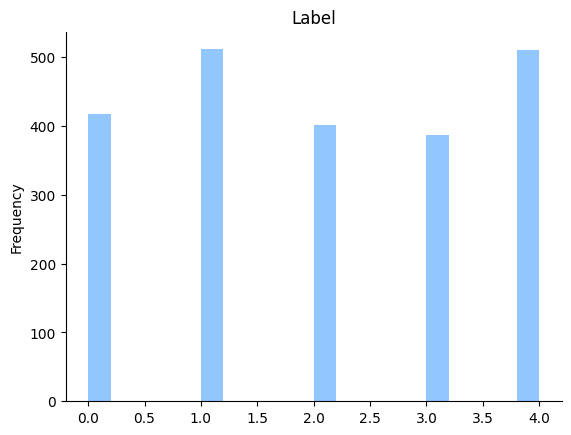

In [62]:
# @title Label

from matplotlib import pyplot as plt
df['Label'].plot(kind='hist', bins=20, title='Label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [63]:
df.shape

(2225, 8)

## 3. Fine-Tuning the Model on Newspaper Data


In [64]:
!pip install transformers torch

* Setup Training Configuration

 * Define hyperparameters: batch size, learning rate, number of epochs, and early stopping criteria.
 * Use Hugging Face’s Trainer API for streamlined model fine-tuning on your newspaper dataset.
 * Fine-tune with gradual unfreezing: initially freeze some model layers to retain pretrained language knowledge and gradually unfreeze layers as training progresses.


In [65]:
!pip install datasets

In [66]:

import torch
from transformers import BertForSequenceClassification, Trainer, TrainingArguments, BertTokenizerFast
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

In [67]:
# Load the tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizerFast.from_pretrained(model_name)

model = BertForSequenceClassification.from_pretrained(model_name, num_labels=5)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [68]:
# train test split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(train_data[['input_ids', 'Label_encoded']])
test_dataset = Dataset.from_pandas(train_data[['input_ids', 'Label_encoded']])


In [69]:
df.head(2)

,Text,Label,Label_encoded,cleaned_text,tokenized_sentences,tokenized_words,huggingface_tokens,input_ids
0,Budget to set scene for election\n \n Gordon B...,0,Politics,budget set scene election gordon brown seek pu...,[budget set scene election gordon brown seek p...,"[budget, set, scene, election, gordon, brown, ...","[budget, set, scene, election, gordon, brown, ...","[101, 5166, 2275, 3496, 2602, 5146, 2829, 6148..."
1,Army chiefs in regiments decision\n \n Militar...,0,Politics,army chief regiment decision military chief ex...,[army chief regiment decision military chief e...,"[army, chief, regiment, decision, military, ch...","[army, chief, regiment, decision, military, ch...","[101, 2390, 2708, 3483, 3247, 2510, 2708, 3517..."


In [70]:
# Define the training arguments with matching save and evaluation strategies
training_args = TrainingArguments(
    output_dir='./results',           # output directory
    evaluation_strategy="epoch",      # evaluate each epoch
    save_strategy="epoch",            # save model checkpoint each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=8,    # batch size for training
    per_device_eval_batch_size=8,     # batch size for evaluation
    num_train_epochs=3,               # number of training epochs
    weight_decay=0.01,                # strength of weight decay
    logging_dir='./logs',             # directory for storing logs
    load_best_model_at_end=True
)



* Train and Evaluate

 * Start training and monitor model performance (accuracy, F1-score) on the validation set.
 * Use metrics to track progress and ensure that your model generalizes well to unseen data.

In [71]:
# prompt: 1 pip install peft

!pip install peft


In [72]:
df

,Text,Label,Label_encoded,cleaned_text,tokenized_sentences,tokenized_words,huggingface_tokens,input_ids
0,Budget to set scene for election\n \n Gordon B...,0,Politics,budget set scene election gordon brown seek pu...,[budget set scene election gordon brown seek p...,"[budget, set, scene, election, gordon, brown, ...","[budget, set, scene, election, gordon, brown, ...","[101, 5166, 2275, 3496, 2602, 5146, 2829, 6148..."
1,Army chiefs in regiments decision\n \n Militar...,0,Politics,army chief regiment decision military chief ex...,[army chief regiment decision military chief e...,"[army, chief, regiment, decision, military, ch...","[army, chief, regiment, decision, military, ch...","[101, 2390, 2708, 3483, 3247, 2510, 2708, 3517..."
2,Howard denies split over ID cards\n \n Michael...,0,Politics,howard denies split id card michael howard den...,[howard denies split id card michael howard de...,"[howard, denies, split, id, card, michael, how...","[howard, denies, split, id, card, michael, how...","[101, 4922, 23439, 3975, 8909, 4003, 2745, 492..."
3,Observers to monitor UK election\n \n Minister...,0,Politics,observer monitor uk election minister invite i...,[observer monitor uk election minister invite ...,"[observer, monitor, uk, election, minister, in...","[observer, monitor, uk, election, minister, in...","[101, 9718, 8080, 2866, 2602, 2704, 13260, 224..."
4,Kilroy names election seat target\n \n Ex-chat...,0,Politics,kilroy name election seat target exchat show h...,[kilroy name election seat target exchat show ...,"[kilroy, name, election, seat, target, exchat,...","[ki, ##lr, ##oy, name, election, seat, target,...","[101, 11382, 20974, 6977, 2171, 2602, 2835, 45..."
...,...,...,...,...,...,...,...,...
2220,India opens skies to competition\n \n India wi...,4,Entertainment,india open sky competition india allow domesti...,[india open sky competition india allow domest...,"[india, open, sky, competition, india, allow, ...","[india, open, sky, competition, india, allow, ...","[101, 2634, 2330, 3712, 2971, 2634, 3499, 4968..."
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4,Entertainment,yukos bankruptcy u matter russian authority ab...,[yukos bankruptcy u matter russian authority a...,"[yukos, bankruptcy, u, matter, russian, author...","[yu, ##kos, bankruptcy, u, matter, russian, au...","[101, 9805, 15710, 10528, 1057, 3043, 2845, 36..."
2222,Survey confirms property slowdown\n \n Governm...,4,Entertainment,survey confirms property slowdown government f...,[survey confirms property slowdown government ...,"[survey, confirms, property, slowdown, governm...","[survey, confirms, property, slow, ##down, gov...","[101, 5002, 23283, 3200, 4030, 7698, 2231, 327..."
2223,High fuel prices hit BA's profits\n \n British...,4,Entertainment,high fuel price hit ba profit british airway b...,[high fuel price hit ba profit british airway ...,"[high, fuel, price, hit, ba, profit, british, ...","[high, fuel, price, hit, ba, profit, british, ...","[101, 2152, 4762, 3976, 2718, 8670, 5618, 2329..."


In [73]:
import os
import torch
import pandas as pd
from transformers import BertForSequenceClassification, Trainer, TrainingArguments, BertTokenizerFast
from peft import get_peft_model, LoraConfig, TaskType
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

In [74]:

# Disable Weights and Biases logging
os.environ["WANDB_MODE"] = "disabled"

# Convert categorical labels to integers
label_mapping = {label: idx for idx, label in enumerate(df['Label_encoded'].unique())}
df['labels'] = df['Label_encoded'].map(label_mapping)

# Load tokenizer and base model
model_name = "bert-base-uncased"
tokenizer = BertTokenizerFast.from_pretrained(model_name)
base_model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(label_mapping))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [75]:
# Configure LoRA for the model
lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    inference_mode=False,
    r=8,
    lora_alpha=16,
    lora_dropout=0.1
)

In [76]:

# Load the base model and apply LoRA
model = get_peft_model(base_model, lora_config)

# Split the dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the data with padding and truncation
def tokenize_function(example):
    return tokenizer(example['cleaned_text'], padding="max_length", truncation=True)

# Create Hugging Face datasets and tokenize
train_dataset = Dataset.from_pandas(train_data[['cleaned_text', 'labels']])
test_dataset = Dataset.from_pandas(test_data[['cleaned_text', 'labels']])
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format to tensors for compatibility with PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Prepare DatasetDict for Trainer
dataset = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

Map:   0%|          | 0/1780 [00:00<?, ? examples/s]

Map:   0%|          | 0/445 [00:00<?, ? examples/s]

In [77]:
train_dataset

Dataset({
    features: ['cleaned_text', 'labels', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1780
})

In [82]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="epoch",
    load_best_model_at_end=True
)

# Select only the first 500 and 100 train test samples from train and test datasets
train_subset = dataset['train'].select(range(500))
eval_subset = dataset['test'].select(range(100))

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_subset,
    eval_dataset=eval_subset,
    tokenizer=tokenizer
)

# Fine-tune the model
trainer.train()


Epoch,Training Loss,Validation Loss
1,No log,1.608324
2,No log,1.582232
3,No log,1.573190


TrainOutput(global_step=375, training_loss=1.58536083984375, metrics={'train_runtime': 126.5793, 'train_samples_per_second': 11.85, 'train_steps_per_second': 2.963, 'total_flos': 396053885952000.0, 'train_loss': 1.58536083984375, 'epoch': 3.0})

In [84]:

# Save the fine-tuned model and tokenizer
model.save_pretrained("finetuned-bert-lora-news-sentiment")
tokenizer.save_pretrained("finetuned-bert-lora-tokenizer")

# Evaluate the model
eval_results = trainer.evaluate()
print(f"Evaluation Results: {eval_results}\m")


Evaluation Results: {'eval_loss': 1.5731897354125977, 'eval_runtime': 3.1011, 'eval_samples_per_second': 32.246, 'eval_steps_per_second': 8.062, 'epoch': 3.0}\m


In [85]:
df['Text'][0]

'Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n  - A freeze on petrol duty \n  - An extension of tax credit scheme for poorer families \n  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much g

In [94]:
df["Text"][0]

'Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n  - A freeze on petrol duty \n  - An extension of tax credit scheme for poorer families \n  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much g

## 4. Integrate LangChain for Enhanced Data Processing and Interaction

* Use LangChain for Data Preprocessing Pipelines

 * Leverage LangChain's chain functionalities to preprocess and augment text data automatically.
 * Example: Build a pipeline that identifies keywords, topics, or entities in news articles for a richer sentiment analysis.
* Incorporate Retrieval-Augmented Generation (Optional)

 * If exploring RAG, integrate an indexing solution (e.g., FAISS or ElasticSearch) to store news articles and retrieve relevant context during inference.

 * Implement a LangChain retrieval chain to provide background information on news topics, enhancing interpretability for each sentiment prediction.


## 5. Optimize Model Performance

* Experiment with Advanced Techniques
 * Try model distillation (if using a large model) to reduce model size and inference time.
 * Experiment with knowledge distillation, where a smaller student model learns from your fine-tuned model (teacher) to produce a faster version without losing accuracy.
* Hyperparameter Tuning
 * Perform grid search or use tools like Optuna or Ray Tune to optimize hyperparameters for better performance.
 * Optimize based on validation metrics to avoid overfitting on the  training set.

## 6. Model Evaluation and Testing


* Evaluate on Test Set

 * Measure final performance on the test set to evaluate real-world performance.
 * Calculate metrics such as accuracy, F1-score, precision, recall, and confusion matrix for a comprehensive view of model performance across sentiment classes.

* Error Analysis

 * Analyze incorrect predictions to identify model weaknesses or biases.
 * Consider using LangChain’s chain functionalities for interpretability, where it generates an explanation of why a particular sentiment was predicted.
